# Plotting results of predictions

To do:
* Need to mask NaNs in any variables at any time-step as fill-value will be non-sensical

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

## Calculate net ecosystem exchange

In [2]:
gpp = xr.open_dataarray('/g/data/os22/chad_tmp/NEE_modelling/results/predictions/GPP_2003_2021.nc')
er = xr.open_dataarray('/g/data/os22/chad_tmp/NEE_modelling/results/predictions/ER_2003_2021.nc')
nee = (gpp - er) * -1 # reverse sign so that -ve is carbon sink
nee.name = 'NEE'
nee.to_netcdf('/g/data/os22/chad_tmp/NEE_modelling/results/predictions/NEE_2003_2021.nc')

## Analysis Parameters

In [3]:
var = 'NEE'
results_name = 'NEE_2003_2021.nc'
data_path = '/g/data/os22/chad_tmp/NEE_modelling/results/prediction_data/prediction_data_2002-10_2021.nc'

### Open predictions

In [4]:
ds = xr.open_dataarray('/g/data/os22/chad_tmp/NEE_modelling/results/predictions/'+results_name)

### Create a mask

In [5]:
data = xr.open_dataset(data_path)
mask = data.lai.isnull().all('time')

## Facet plots

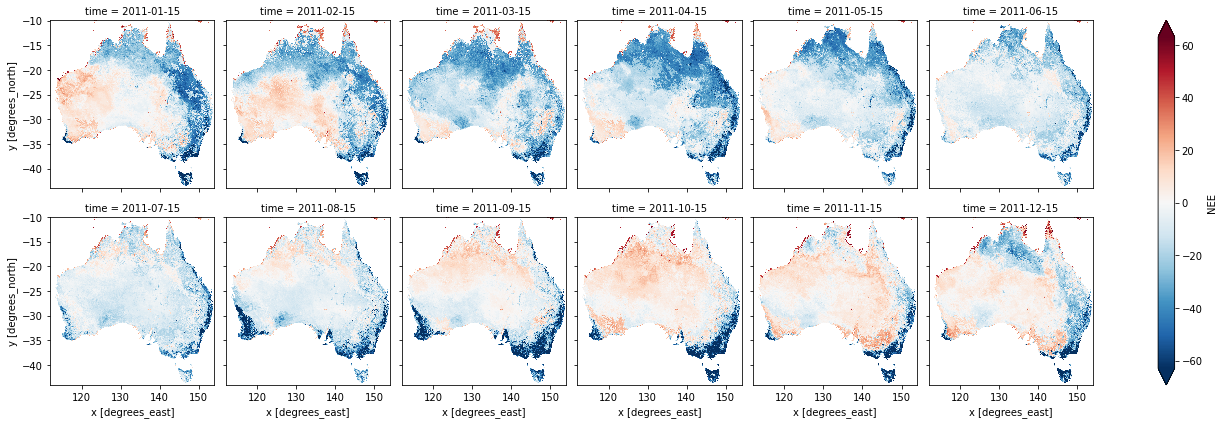

In [6]:
year='2011'
ds.sel(time=year).plot.imshow(col='time', col_wrap=6, robust=True, cmap='RdBu_r');

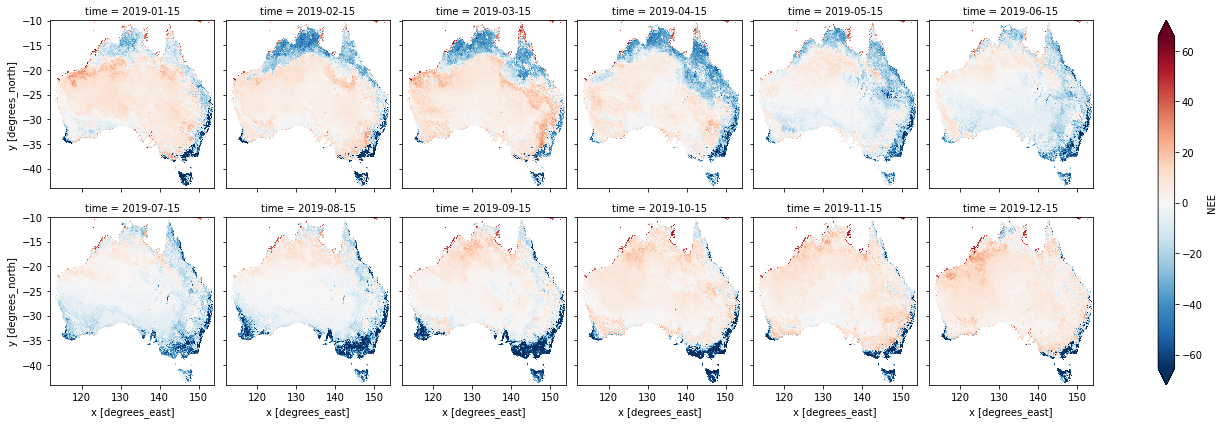

In [7]:
year='2019'
ds.sel(time=year).plot.imshow(col='time', col_wrap=6, robust=True, cmap='RdBu_r');

## Zonal summaries

In [8]:
ds_1D = ds.sum(['x','y'])

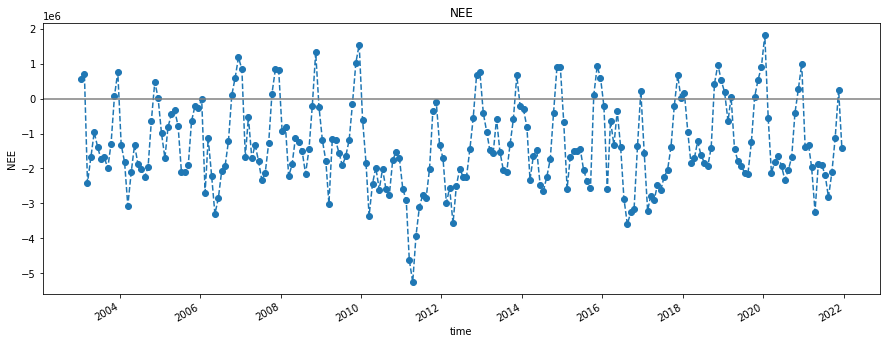

In [13]:
ds_1D.plot(figsize=(15,5), marker='o', linestyle='--')
plt.axhline(0, c='grey')
plt.title(var);

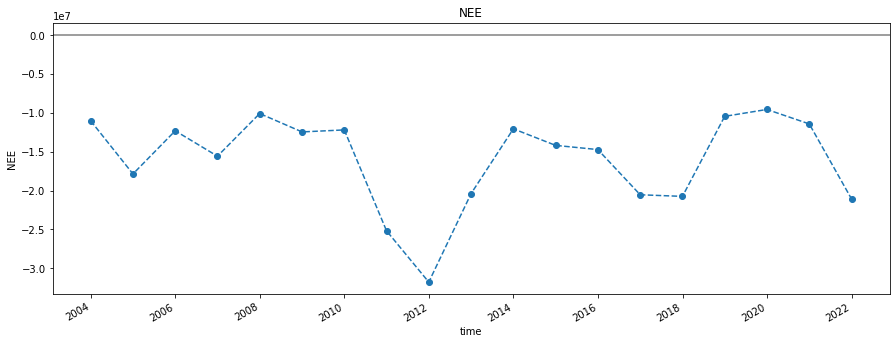

In [14]:
ds_1D_annual = ds_1D.resample(time='1Y').sum() 
ds_1D_annual.plot(figsize=(15,5), marker='o', linestyle='--')
plt.axhline(0, c='grey')
plt.title(var);

## Per-pixel summaries

In [15]:
annual_mean = ds.groupby('time.year').sum().mean('year')
annual_std = ds.groupby('time.year').sum().std('year')

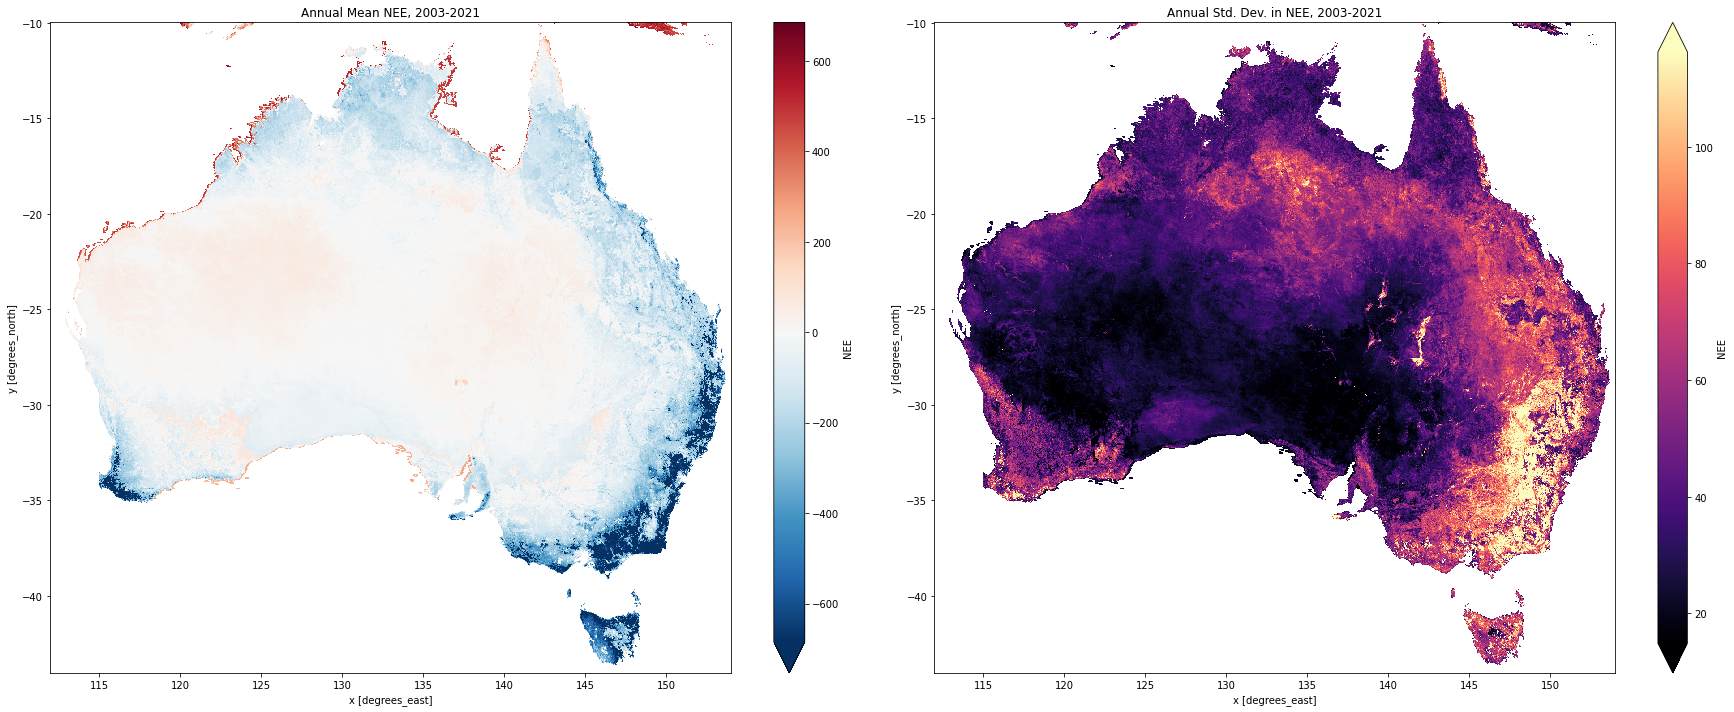

In [16]:
fig,ax = plt.subplots(1,2, figsize=(25,10))
annual_mean.where(~mask).plot.imshow(ax=ax[0], robust=True, cmap='RdBu_r')
annual_std.where(~mask).plot.imshow(ax=ax[1], cmap='magma', robust=True)
ax[0].set_title('Annual Mean NEE, 2003-2021')
ax[1].set_title('Annual Std. Dev. in NEE, 2003-2021')
# plt.suptitle('Annual Mean and Std. Dev. of GPP, 2003-2021')
plt.tight_layout();

In [22]:
monthly_mean = ds.groupby('time.month').mean()
monthly_std = ds.groupby('time.month').std()

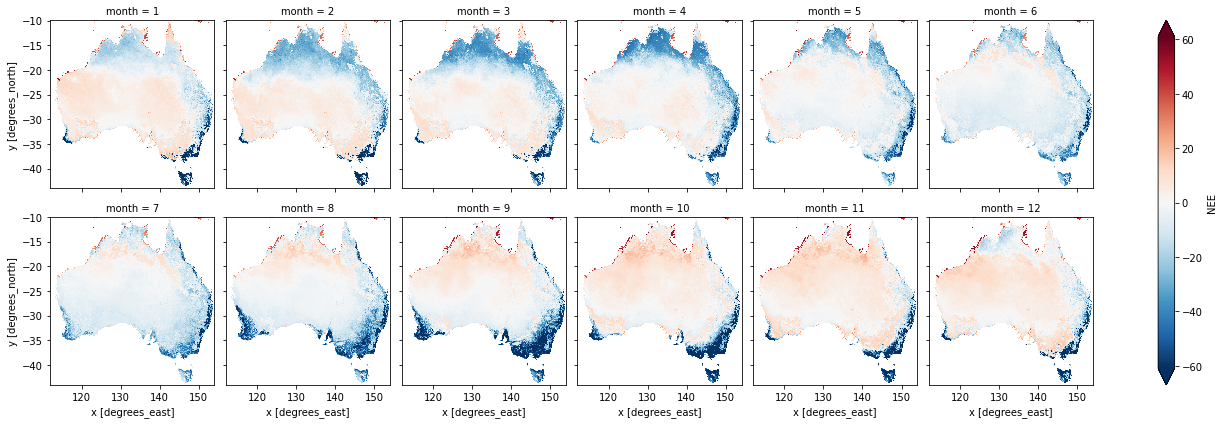

In [20]:
monthly_mean.where(~mask).plot.imshow(col='month', col_wrap=6, robust=True, cmap='RdBu_r')

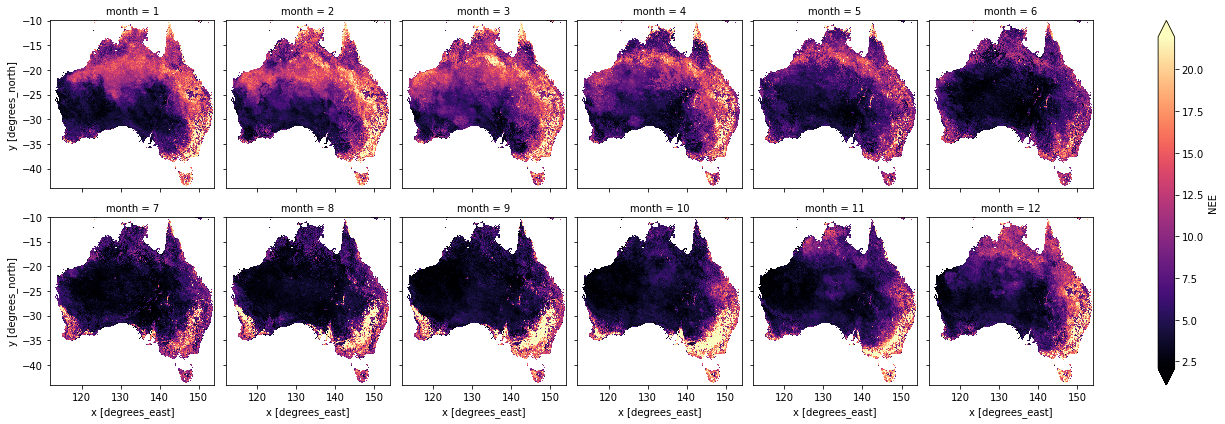

In [21]:
monthly_std.where(~mask).plot.imshow(col='month', col_wrap=6,robust=True, cmap='magma');

## Fluxcom

In [9]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

In [10]:
nee = xr.open_dataset('/g/data/os22/chad_tmp/NEE_modelling/data/FLUXCOM/nee_rs_meteo_era5.nc')

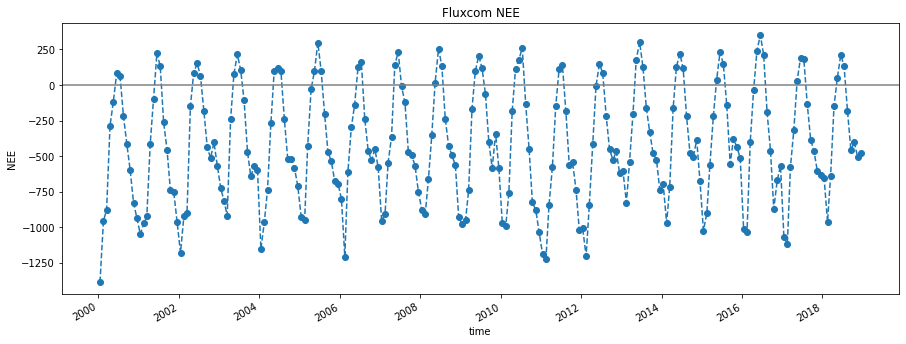

In [11]:
nee_1D = nee.NEE.sum(['lat','lon'])
nee_1D.plot(figsize=(15,5), marker='o', linestyle='--')
plt.axhline(0, c='grey')
plt.title('Fluxcom NEE');

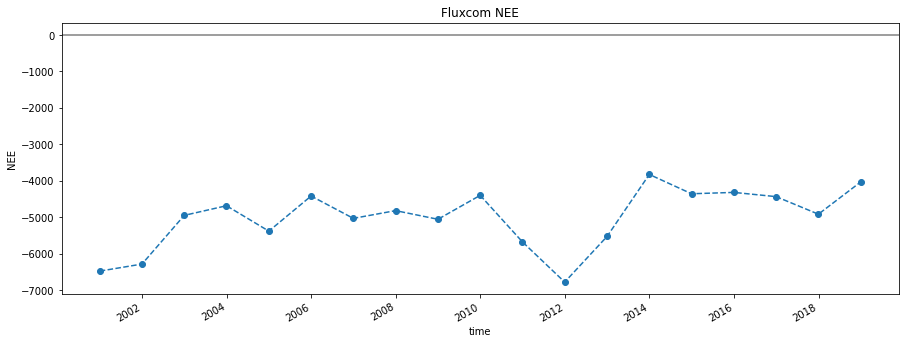

In [12]:
nee_1D_annual = nee_1D.resample(time='1Y').sum() 
nee_1D_annual.plot(figsize=(15,5), marker='o', linestyle='--')
plt.axhline(0, c='grey')
plt.title('Fluxcom NEE');

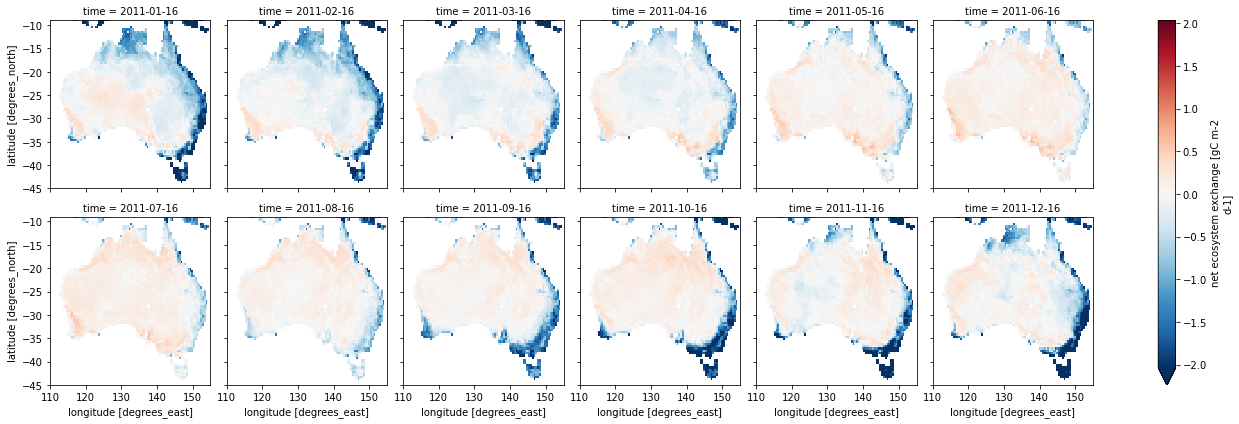

In [14]:
year='2011'
nee.NEE.sel(time=year).plot.imshow(col='time', col_wrap=6, robust=True, cmap='RdBu_r');

In [15]:
annual_mean = nee.NEE.groupby('time.year').sum().mean('year')
annual_std = nee.NEE.groupby('time.year').sum().std('year')

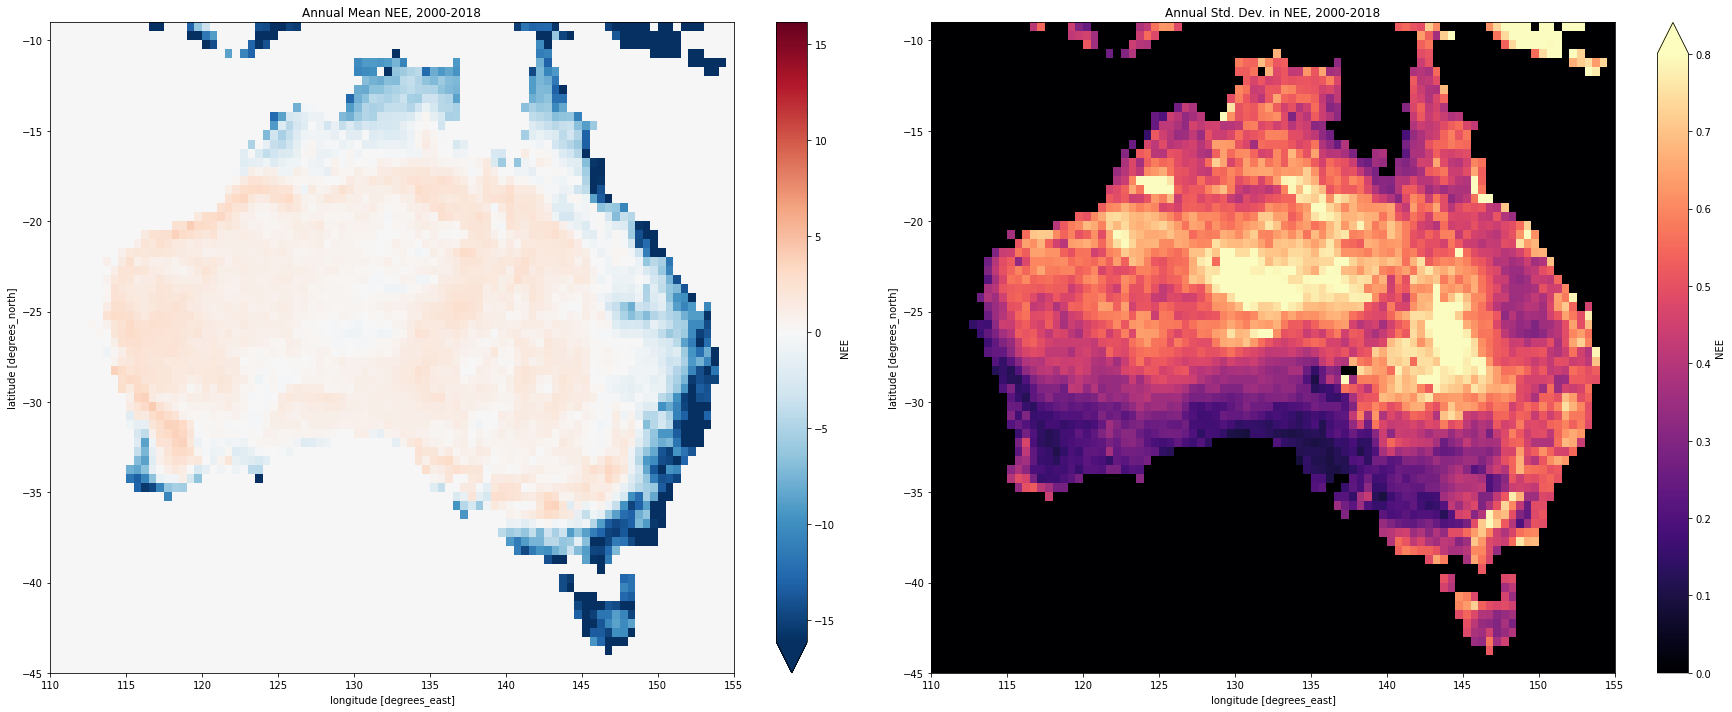

In [17]:
fig,ax = plt.subplots(1,2, figsize=(25,10))
annual_mean.plot.imshow(ax=ax[0], robust=True, cmap='RdBu_r')
annual_std.plot.imshow(ax=ax[1], cmap='magma', robust=True)
ax[0].set_title('Annual Mean NEE, 2000-2018')
ax[1].set_title('Annual Std. Dev. in NEE, 2000-2018')
plt.tight_layout();

## SIF

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

In [10]:
sif = xr.open_dataarray('/g/data/os22/chad_tmp/NEE_modelling/data/SIF/GOSIF_2000_2020.nc').sel(time=slice('2003','2021'))

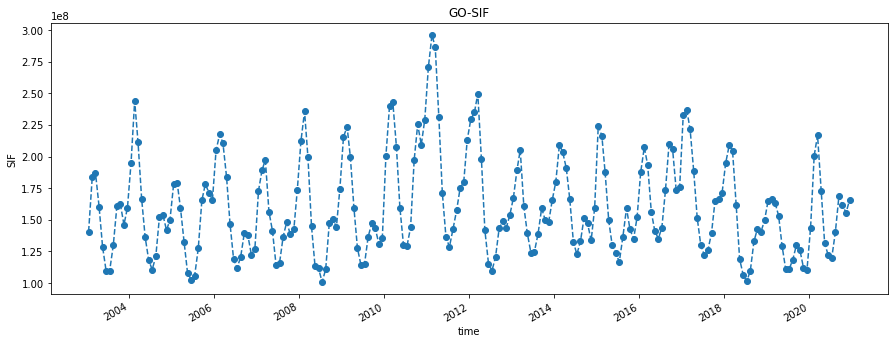

In [11]:
sif_1D = sif.sum(['x','y'])
sif_1D.plot(figsize=(15,5), marker='o', linestyle='--')
# plt.axhline(0, c='grey')
plt.title('GO-SIF');

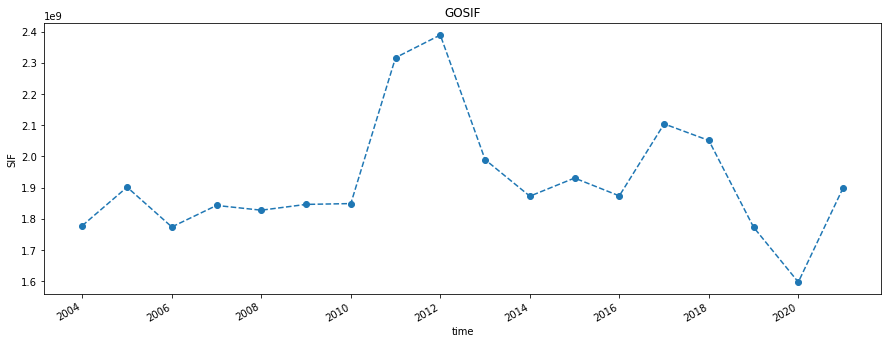

In [13]:
sif_1D_annual = sif_1D.resample(time='1Y').sum() 
sif_1D_annual.plot(figsize=(15,5), marker='o', linestyle='--')
# plt.axhline(0, c='grey')
plt.title('GOSIF');